## 4.1 The maximum subarray problem

In [1]:
function find_max_sub(A, low, high)
    if low == high
        return (A[low], low, low)
    end
    mid = div(low+high, 2)
    sum_left, low_left, high_left = find_max_sub(A, low, mid)
    sum_right, low_right, high_right = find_max_sub(A, mid + 1, high)
    sum_cross, low_cross, high_cross = find_max_cross_sub(A, low, mid, high)
    println("Sub table [$low:$mid] $(A[low:mid]) | $(A[mid+1:high]) [$(mid+1):$high]")
    println("L=$sum_left, C=$sum_cross, R=$sum_right")
    if sum_left >= sum_right
        if sum_left >= sum_cross
            println("LEFT  $sum_left, $low_left, $high_left")
            return (sum_left, low_left, high_left)
        else
            println("CROSS $sum_cross, $low_cross, $high_cross")
            return (sum_cross, low_cross, high_cross)
        end
    elseif sum_right >= sum_cross
        println("RIGHT $sum_right, $low_right, $high_right")
        return (sum_right, low_right, high_right)
    else
        println("CROSS $sum_cross, $low_cross, $high_cross")
        return (sum_cross, low_cross, high_cross)
    end
end

find_max_sub (generic function with 1 method)

In [2]:
function find_max_cross_sub(A, low, mid, high)
    sum, leftsum = 0, typemin(Int)
    maxleft, maxright = mid, mid
    for i in mid:-1:low
        sum += A[i]
        if sum > leftsum
            leftsum = sum
            maxleft = i
        end
    end
    sum, rightsum = 0, typemin(Int)
    for i in mid+1:high
        sum += A[i]
        if sum > rightsum
            rightsum = sum
            maxright = i
        end
    end
    return (leftsum + rightsum, maxleft, maxright)
end

find_max_cross_sub (generic function with 1 method)

In [23]:
a = [1, 2, -1, -1, 2, 4, -4, -3, 3, 3, 3, -5, 3, 3, 3, -2, 1, -4, -5, -6]
s, l, r = find_max_sub(a, 1, length(a))

Sub table [1:1] [1] | [2] [2:2]
L=1, C=3, R=2
CROSS 3, 1, 2
Sub table [1:2] [1, 2] | [-1] [3:3]
L=3, C=2, R=-1
LEFT  3, 1, 2
Sub table [4:4] [-1] | [2] [5:5]
L=-1, C=1, R=2
RIGHT 2, 5, 5
Sub table [1:3] [1, 2, -1] | [-1, 2] [4:5]
L=3, C=3, R=2
LEFT  3, 1, 2
Sub table [6:6] [4] | [-4] [7:7]
L=4, C=0, R=-4
LEFT  4, 6, 6
Sub table [6:7] [4, -4] | [-3] [8:8]
L=4, C=-3, R=-3
LEFT  4, 6, 6
Sub table [9:9] [3] | [3] [10:10]
L=3, C=6, R=3
CROSS 6, 9, 10
Sub table [6:8] [4, -4, -3] | [3, 3] [9:10]
L=4, C=3, R=6
RIGHT 6, 9, 10
Sub table [1:5] [1, 2, -1, -1, 2] | [4, -4, -3, 3, 3] [6:10]
L=3, C=7, R=6
CROSS 7, 1, 6
Sub table [11:11] [3] | [-5] [12:12]
L=3, C=-2, R=-5
LEFT  3, 11, 11
Sub table [11:12] [3, -5] | [3] [13:13]
L=3, C=1, R=3
LEFT  3, 11, 11
Sub table [14:14] [3] | [3] [15:15]
L=3, C=6, R=3
CROSS 6, 14, 15
Sub table [11:13] [3, -5, 3] | [3, 3] [14:15]
L=3, C=9, R=6
CROSS 9, 13, 15
Sub table [16:16] [-2] | [1] [17:17]
L=-2, C=-1, R=1
RIGHT 1, 17, 17
Sub table [16:17] [-2, 1] | [-4] [18:1

(13, 9, 15)

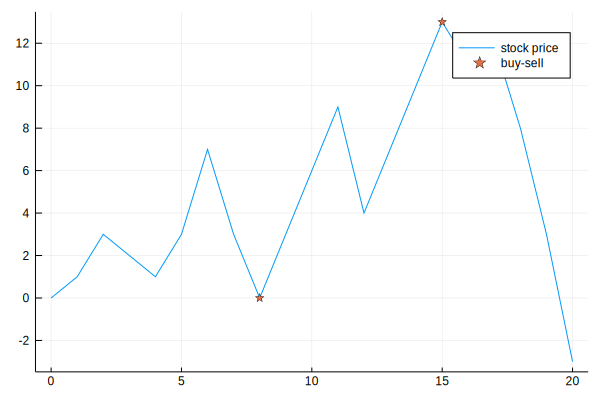

In [34]:
using Plots
cumsum = vcat([0], [sum(a[1:i]) for i in 1:length(a)])
plot(0:length(a), cumsum, label="stock price")
scatter!([l-1, r], [cumsum[l], cumsum[r+1]], m=:star5, label="buy-sell")